In [1]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly
from scipy.spatial.distance import euclidean as eu
from scipy.spatial.distance import cosine 
import math
from scipy import signal

from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import preprocessing

In [2]:
D_path = glob.glob('Data\Dyslexic' + "\*")
C_path = glob.glob('Data\Control' + "\*")

C_data = []
for path in C_path:
    temp = pd.read_csv(path)
    temp = temp.drop('Unnamed: 0',axis = 1)
    C_data.append(temp)

D_data = []
for path in D_path:
    temp = pd.read_csv(path)
    temp = temp.drop('Unnamed: 0',axis = 1)
    D_data.append(temp)
    
C_new = []
for data in C_data:
    X =data[['LX','RX']]
    Y =data[['LY','RY']]
    Xm = X.mean(axis=1)
    Ym = Y.mean(axis=1)
    f = pd.DataFrame([data.iloc[:,0],Xm,Ym])
    f = f.transpose()
    f = f.rename(columns = {'Unnamed 0': 'X', 'Unnamed 1': 'Y'})
    C_new.append(f)

D_new = []
for data in D_data:
    X =data[['LX','RX']]
    Y =data[['LY','RY']]
    Xm = X.mean(axis=1)
    Ym = Y.mean(axis=1)
    f = pd.DataFrame([data.iloc[:,0],Xm,Ym])
    f = f.transpose()
    f = f.rename(columns = {'Unnamed 0': 'X', 'Unnamed 1': 'Y'})
    D_new.append(f)

In [3]:


for i in range(len(C_new)):
    C_tempx = np.abs(C_new[i]['X'])
    mx = max(C_tempx)
    C_tempy = np.abs(C_new[i]['Y'])
    my= max(C_tempy)
    C_new[i]['X'] = C_new[i]['X']/np.abs(mx)
    C_new[i]['Y'] = C_new[i]['Y']/np.abs(my)
for i in range(len(D_new)):
    D_tempx = np.abs(D_new[i]['X'])
    mx = max(D_tempx)
    D_tempy = np.abs(D_new[i]['Y'])
    my= max(D_tempy)
    D_new[i]['X'] = D_new[i]['X']/np.abs(mx)
    D_new[i]['Y'] = D_new[i]['Y']/np.abs(my)    

In [4]:
C_cmx = []
C_real= []
C_img=[]
for j in range(len(C_new)):
    dat = C_new[j]
    x = dat['X']
    y = dat['Y']
    t = dat['T']
    
    z=[]
    x_in=[]
    y_in=[]
    for i in range(0,x.size):
        z.append(complex(x[i],y[i]))
        x_in.append(x[i])
        y_in.append(y[i])
    
    
    C_cmx.append(z)
    C_real.append(x_in)
    C_img.append(y_in)

D_cmx = []
D_real= []
D_img=[]
for j in range(len(D_new)):
    dat = D_new[j]
    x = dat['X']
    y = dat['Y']
    t = dat['T']
    
    z=[]
    x_in=[]
    y_in=[]
    for i in range(0,x.size):
        z.append(complex(x[i],y[i]))
        x_in.append(x[i])
        y_in.append(y[i])
    D_cmx.append(z)
    D_real.append(x_in)
    D_img.append(y_in)

In [98]:
def stft_run(n_ratio,o_ratio):
    C_spec = []
    vec= []
    for j in range(len(tmat)):
        data = tmat[j]
        L= len(data)+1
        k = int((len(data) + 1)/250) # k varies from 4 to 8
        N=20
        B  = L/n_ratio
        E =B/o_ratio#round((N*B - L)/(N-1))
        nf = 2000/n_ratio
        f, t, Zxx = signal.stft(tmat[j],fs= L/250, nperseg=B,noverlap= E,nfft=nf)
        
        tot = np.abs(Zxx)**2
        
        
        C_spec.append(np.abs(Zxx)**2)
    
    vec = []
    for i in range(len(C_spec)):
        vec.append(C_spec[i])
    print(C_spec[i].shape)
    
    for i in range(len(C_spec)):
        vec[i]=vec[i].flatten()
    
    

    return vec

In [99]:
def stft_run_half(n_ratio,o_ratio,lim):
    lim= int(lim)
    C_spec = []
    vec= []
    for j in range(len(tmat)):
        data = tmat[j]
        L= len(data)+1
        k = int((len(data) + 1)/250) # k varies from 4 to 8
        N=20
        B  = L/n_ratio
        E =B/o_ratio#round((N*B - L)/(N-1))
        nf = 2000/n_ratio
        f, t, Zxx = signal.stft(tmat[j],fs= L/250, nperseg=B,noverlap= E,nfft=nf)
        
        tot = np.abs(Zxx)**2
        half_im=[]
        for i in range(len(tot)):
            half_im.append(tot[0][0:lim])
            
        
        C_spec.append(np.asarray(half_im))
    
    vec = []
    for i in range(len(C_spec)):
        vec.append(C_spec[i])
    #print(C_spec[i].shape)
    
    for i in range(len(C_spec)):
        vec[i]=vec[i].flatten()
    
    

    return vec

In [222]:
def stft_run_freq(n_ratio,o_ratio,lim):
    lim= int(lim)
    C_spec = []
    vec= []
    for j in range(len(tmat)):
        data = tmat[j]
        L= len(data)+1
        k = int((len(data) + 1)/250) # k varies from 4 to 8
        N=20
        B  = L/n_ratio
        E =B/o_ratio#round((N*B - L)/(N-1))
        nf = 2000/n_ratio
        f, t, Zxx = signal.stft(tmat[j],fs= L/250, nperseg=B,noverlap= E,nfft=nf)
        
        tot = np.abs(Zxx)**2
        
        
        C_spec.append(np.abs(Zxx)**2)
    
    vec = []
    for i in range(len(C_spec)):
        vec.append(C_spec[i])
    print(C_spec[i].shape)
    
    lfvec =[]
    hfvec =[]
    for i in range(len(C_spec)):
        x=vec[i].flatten()
        lfvec.append(x[:lim])
        hfvec.append(x[lim:])
    
    

    return lfvec,hfvec

In [7]:
def stft_run_mod(n_ratio,o_ratio):
    C_spec = []
    vec= []
    for j in range(len(tmat)):
        data = tmat[j]
        L= len(data)+1
        k = int((len(data) + 1)/250) # k varies from 4 to 8
        N=20
        B  = L/n_ratio
        E =B/o_ratio#round((N*B - L)/(N-1))
        nf = k*100
        f, t, Zxx = signal.stft(tmat[j],fs= L/250, nperseg=B,noverlap= E,nfft=nf)
        
        tot = np.abs(Zxx)**2
        flat =  tot.flatten()
        C_spec.append(np.abs(Zxx)**2)
        pad_len = int((800 - nf)/2)
        vec_temp= []
        for i in range(pad_len):
            vec_temp.append(0)
        for i in range(len(flat)):
            vec_temp.append(flat[i])
        for i in range(pad_len):
            vec_temp.append(0)
        vec.append(vec_temp)
    
    #vec = []
    #for i in range(len(C_spec)):
        #vec.append(C_spec[i])
    #print(C_spec[i].shape)
    
    #for i in range(len(C_spec)):
        #vec[i]=vec[i].flatten()
    
    

    return vec

In [8]:
tmat=[]
for i in range(88):
    tmat.append(C_cmx[i])
for i in range(98):
    tmat.append(D_cmx[i])



In [7]:
import pandas as pd

def plot_decision_boundaries(X, y, model_class, **model_params):
    """
    Function to plot the decision boundaries of a classification model.
    This uses just the first two columns of the data for fitting 
    the model as we need to find the predicted value for every point in 
    scatter plot.
    Arguments:
            X: Feature data as a NumPy-type array.
            y: Label data as a NumPy-type array.
            model_class: A Scikit-learn ML estimator class 
            e.g. GaussianNB (imported from sklearn.naive_bayes) or
            LogisticRegression (imported from sklearn.linear_model)
            **model_params: Model parameters to be passed on to the ML estimator
    
    Typical code example:
            plt.figure()
            plt.title("KNN decision boundary with neighbros: 5",fontsize=16)
            plot_decision_boundaries(X_train,y_train,KNeighborsClassifier,n_neighbors=5)
            plt.show()
    """
    try:
        X = np.array(X)
        y = np.array(y).flatten()
    except:
        print("Coercing input data to NumPy arrays failed")
    # Reduces to the first two columns of data
    reduced_data = X[:, :2]
    # Instantiate the model object
    model = model_class(**model_params)
    # Fits the model with the reduced data
    model.fit(reduced_data, y)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].    

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    # Meshgrid creation
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh using the model.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])    

    x_min, x_max = X[:, 8].min() - 1, X[:, 8].max() + 1
    y_min, y_max = X[:, 66].min() - 1, X[:, 65].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predictions to obtain the classification results
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Plotting
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.xlabel("Feature-1",fontsize=15)
    plt.ylabel("Feature-2",fontsize=15)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    return plt

In [253]:
lvec,hvec = stft_run_freq(125,2,3500)

C:\Python\Python37\lib\site-packages\scipy\signal\spectral.py:1815: UserWarning:

Input data is complex, switching to return_onesided=False



(16, 251)


In [254]:
len(lvec[0])

3500

In [256]:
X = np.asarray(hvec)
X_train, X_test,y_train,y_test,index_train,index_test= create_train_test(X,index)

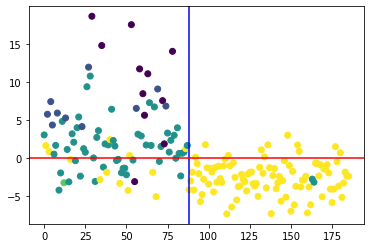

In [257]:
res1 = final(X_train,y_train,X,y)

## The Perceptron Output
X axis: Index of data <br/> 
Y axis: Distance from separating line <br/> <br/>
There are four quadrants in the output.<br/>
The RED LINE represents the  output separation line: <br/> If the point is above, it is classified as the control group. Below the red line, it is classified as Dyslexic <br/>
The distance of a point from the red line is the distance from the separating plane<br/>
The BLUE LINE is the actual label separation: <br/>
The points to the left are control group and to the right are dyslexic group. <br/>
This makes the TOP LEFT and BOTTOM RIGHT correctly classified as control and dyslexic respectively.<br/>
While the BOTTOM LEFT and TOP RIGHT are wrongly classified point. 

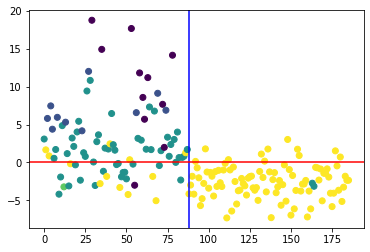

In [241]:
res = final(X_train,y_train,X,y)

In [245]:
tr=res+res1

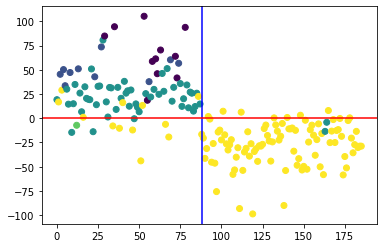

In [249]:
x = range(len(y))
fig, ax = plt.subplots()
ax.scatter(x,tr,c = ylen)
ax.axvline(x=88, color='b', linestyle='-')
ax.axhline(y=0, color='r', linestyle='-')

In [171]:
ylen[164]

2

In [214]:
res[132]

-0.13224792034345256

(0.0, 2.0)

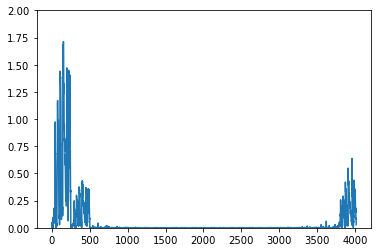

In [215]:
plt.plot(range(4016),vec[132])
plt.ylim(0,2)

C:\Python\Python37\lib\site-packages\scipy\signal\spectral.py:1815: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


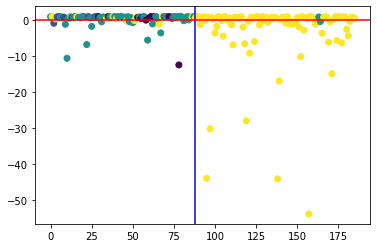

In [123]:
vec = stft_run_half(125,2,10)
X = np.asarray(vec)
X_train, X_test,y_train,y_test,index_train,index_test= create_train_test(X,index)
res = final(X_train,y_train,X,y)

In [110]:
vec = stft_run_freq(125,2,2008)
X = np.asarray(vec)
X_train, X_test,y_train,y_test,index_train,index_test= create_train_test(X,index)
res = final(X_train,y_train,X,y)

(16, 251)


ValueError: The number of classes has to be greater than one; got 1 class

In [24]:
for i in vec:
    print(len(i))

4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016
4016


In [43]:
y = np.random.choice([0, 1], size=186)

In [228]:
y= np.concatenate((np.ones(88), np.zeros(98)))

In [50]:
X, y = load_digits(return_X_y=True)

In [28]:
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron
clf = Perceptron(tol=1e-3, random_state=0)

In [12]:
clf.fit(X, y)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [122]:
clf.score(X, y)

0.7634408602150538

In [49]:
ylen=[]
for s in tmat:
    if(len(s)>1750):
        ylen.append(4)
    elif(len(s)>1500):
        ylen.append(3)
    elif(len(s)>1250):
        ylen.append(2)
    elif(len(s)>1000):
        ylen.append(1)
    else:
        ylen.append(0)

In [38]:
from sklearn.model_selection import train_test_split

In [55]:
def final(X_train,y_train,X,y):
    
    clf.fit(X_train, y_train)
    ht = clf.decision_function(X)
    x = range(len(y))
    fig, ax = plt.subplots()
    ax.scatter(x,ht,c = ylen)
    ax.axvline(x=88, color='b', linestyle='-')
    ax.axhline(y=0, color='r', linestyle='-')
    return ht

In [120]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.5, random_state=42)

In [121]:
clf.fit(X_train, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [106]:
ht = clf.decision_function(X)

In [107]:
x = range(len(y))

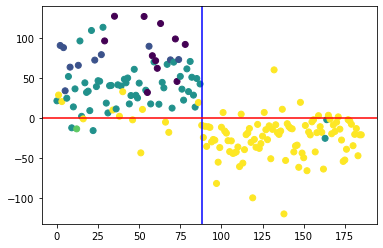

In [108]:
fig, ax = plt.subplots()
ax.scatter(x,ht,c = ylen)
ax.axvline(x=88, color='b', linestyle='-')
ax.axhline(y=0, color='r', linestyle='-')

In [109]:
for i in range(88):
    if(ht[i]<0):
        print(ylen[i])

2
3
4
2
4
4
4
4


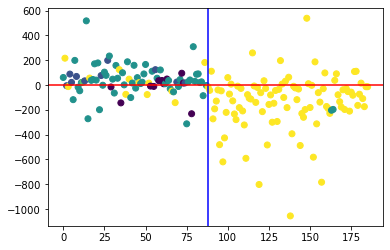

In [124]:
ht = clf.decision_function(X)
x = range(len(y))
fig, ax = plt.subplots()
ax.scatter(x,ht,c = ylen)
ax.axvline(x=88, color='b', linestyle='-')
ax.axhline(y=0, color='r', linestyle='-')

In [32]:
inp = [[125,2],[50,5],[25,2],[25,5],[25,10],[10,5],[10,25]]

In [33]:
imp= [[5,25],[5,50],[2,25],[2,125]]

In [34]:
nfi = [400,800,1000,1200,1500]

In [88]:
y_pred=[]
aglob=[]
for i in inp:
    print(i)
    aloc= []
    y_temp=[]
    for x in nfi:
        vec = stft_run(i[0],i[1],x)
        X = np.asarray(vec)
        X_train, X_test,y_train,y_test,index_train,index_test = create_train_test(X)
        clf.fit(X_train, y_train)
        aloc.append(clf.score(X_test,y_test))
        y_temp.append(clf.predict(X_test))
    y_pred.append(y_temp)
    aglob.append(aloc)
    

[125, 2]


C:\Python\Python37\lib\site-packages\scipy\signal\spectral.py:1815: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
C:\Python\Python37\lib\site-packages\scipy\signal\spectral.py:1815: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
C:\Python\Python37\lib\site-packages\scipy\signal\spectral.py:1815: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
C:\Python\Python37\lib\site-packages\scipy\signal\spectral.py:1815: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
C:\Python\Python37\lib\site-packages\scipy\signal\spectral.py:1815: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


[50, 5]


C:\Python\Python37\lib\site-packages\scipy\signal\spectral.py:1815: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
C:\Python\Python37\lib\site-packages\scipy\signal\spectral.py:1815: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
C:\Python\Python37\lib\site-packages\scipy\signal\spectral.py:1815: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
C:\Python\Python37\lib\site-packages\scipy\signal\spectral.py:1815: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
C:\Python\Python37\lib\site-packages\scipy\signal\spectral.py:1815: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


[25, 2]


C:\Python\Python37\lib\site-packages\scipy\signal\spectral.py:1815: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
C:\Python\Python37\lib\site-packages\scipy\signal\spectral.py:1815: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
C:\Python\Python37\lib\site-packages\scipy\signal\spectral.py:1815: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
C:\Python\Python37\lib\site-packages\scipy\signal\spectral.py:1815: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
C:\Python\Python37\lib\site-packages\scipy\signal\spectral.py:1815: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


[25, 5]


C:\Python\Python37\lib\site-packages\scipy\signal\spectral.py:1815: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
C:\Python\Python37\lib\site-packages\scipy\signal\spectral.py:1815: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
C:\Python\Python37\lib\site-packages\scipy\signal\spectral.py:1815: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
C:\Python\Python37\lib\site-packages\scipy\signal\spectral.py:1815: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
C:\Python\Python37\lib\site-packages\scipy\signal\spectral.py:1815: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


[25, 10]


C:\Python\Python37\lib\site-packages\scipy\signal\spectral.py:1815: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
C:\Python\Python37\lib\site-packages\scipy\signal\spectral.py:1815: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
C:\Python\Python37\lib\site-packages\scipy\signal\spectral.py:1815: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
C:\Python\Python37\lib\site-packages\scipy\signal\spectral.py:1815: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
C:\Python\Python37\lib\site-packages\scipy\signal\spectral.py:1815: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


[10, 5]


C:\Python\Python37\lib\site-packages\scipy\signal\spectral.py:1815: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
C:\Python\Python37\lib\site-packages\scipy\signal\spectral.py:1815: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
C:\Python\Python37\lib\site-packages\scipy\signal\spectral.py:1815: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
C:\Python\Python37\lib\site-packages\scipy\signal\spectral.py:1815: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
C:\Python\Python37\lib\site-packages\scipy\signal\spectral.py:1815: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


[10, 25]


C:\Python\Python37\lib\site-packages\scipy\signal\spectral.py:1815: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
C:\Python\Python37\lib\site-packages\scipy\signal\spectral.py:1815: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
C:\Python\Python37\lib\site-packages\scipy\signal\spectral.py:1815: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
C:\Python\Python37\lib\site-packages\scipy\signal\spectral.py:1815: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
C:\Python\Python37\lib\site-packages\scipy\signal\spectral.py:1815: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


In [85]:
def get_res(y_p):
    res=[]
    for i in range(len(y_test)):
        if (y_p[i]==y_test[i]):
            res.append(1)
        else:
            res.append(-1)
    return res

In [89]:
res_all=[]
for i in range(7):
    res_temp=[]
    for j in y_pred[i]:
        res_temp.append(get_res(j))
    res_all.append(res_temp)
        
    

In [48]:
from matplotlib.gridspec import GridSpec

In [92]:
aglob

[[0.875,
  0.9285714285714286,
  0.9285714285714286,
  0.8928571428571429,
  0.8928571428571429],
 [0.875,
  0.8571428571428571,
  0.8571428571428571,
  0.9285714285714286,
  0.9285714285714286],
 [0.875, 0.875, 0.875, 0.875, 0.8392857142857143],
 [0.8392857142857143,
  0.8928571428571429,
  0.8571428571428571,
  0.875,
  0.8928571428571429],
 [0.875, 0.8571428571428571, 0.8928571428571429, 0.8928571428571429, 0.875],
 [0.75, 0.8214285714285714, 0.7321428571428571, 0.875, 0.8392857142857143],
 [0.9107142857142857,
  0.8928571428571429,
  0.875,
  0.9107142857142857,
  0.9107142857142857]]

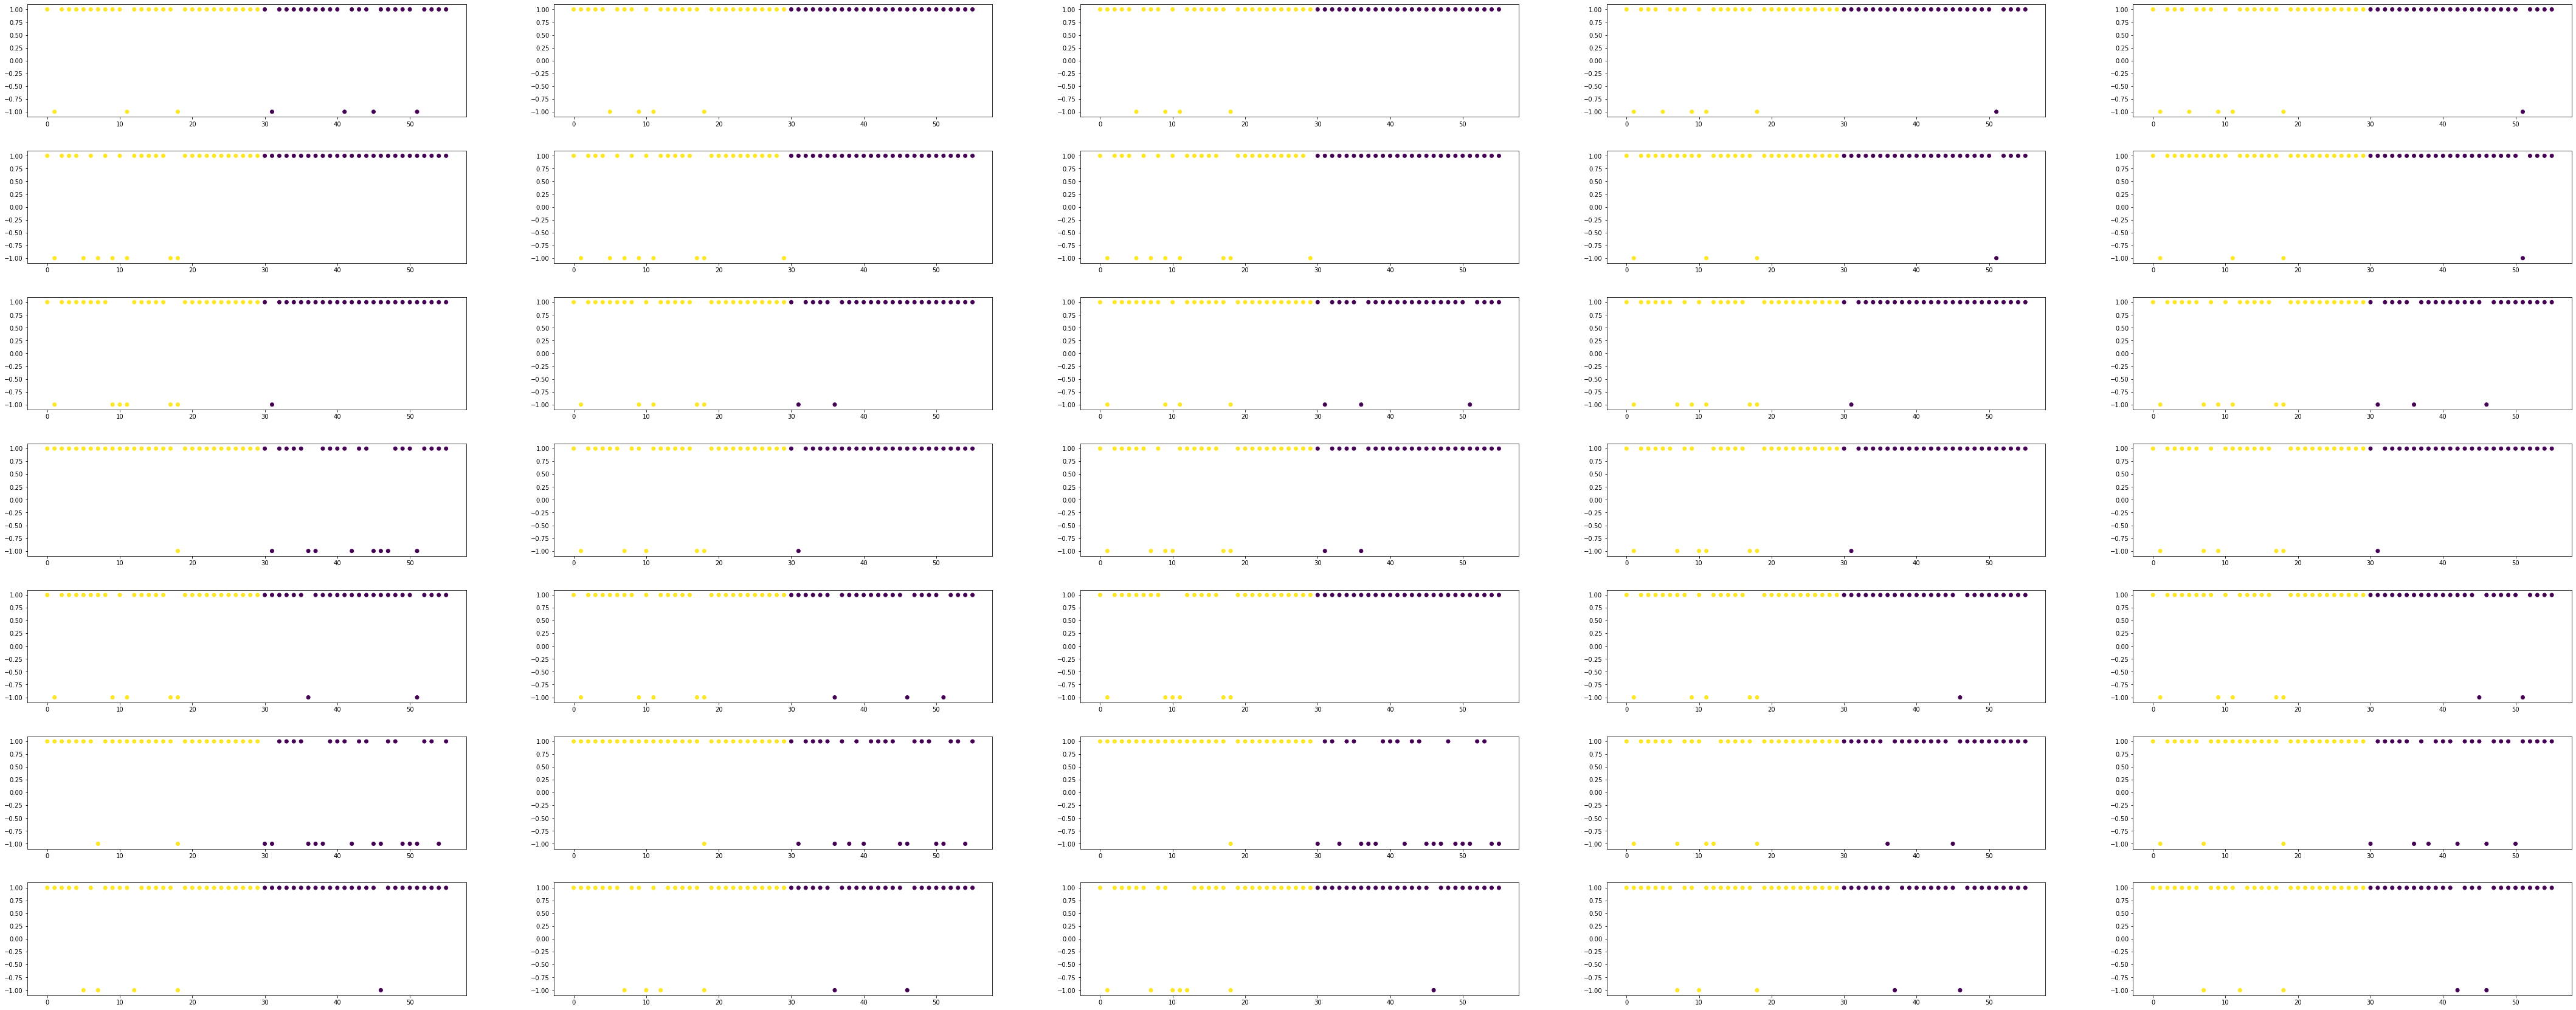

In [90]:
fig = plt.figure(figsize=(75, 30))
gs = GridSpec(nrows=7, ncols=5)
gs.update(wspace = 0.2, hspace = 0.3)
x_ax = range(56)
for i in range(7):
    for j in range(5):
        
        ax_temp = fig.add_subplot(gs[i, j])
        ax_temp.scatter(x_ax,res_all[i][j],c=y_test)

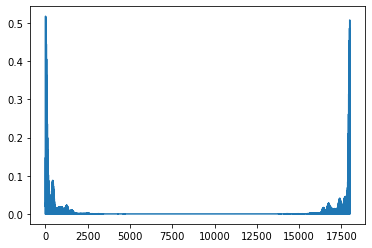

In [101]:
plt.plot(X_test[0])

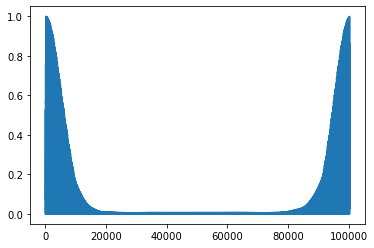

In [64]:
plt.plot(X_test[1])

In [119]:
vec = stft_run(125,2,400)
len(vec[0])

C:\Python\Python37\lib\site-packages\scipy\signal\spectral.py:1815: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


100400

In [120]:
X.shape

(186,)

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.3, random_state=42)

In [15]:
def add_num(ind):
    r=random.randint(0,186)
    if r not in ind:
        ind.append(r)
    else:
        add_num(ind)
    

In [16]:
import random
index=[]
for i in range(56):
    add_num(index)

In [ ]:
import random
index_large=[]
for i in range():
    add_num(index)

In [33]:
index

[0,
 1,
 3,
 8,
 11,
 18,
 20,
 21,
 26,
 27,
 30,
 32,
 37,
 40,
 52,
 57,
 61,
 63,
 64,
 65,
 69,
 72,
 73,
 74,
 75,
 77,
 80,
 86,
 89,
 91,
 105,
 106,
 108,
 111,
 114,
 117,
 122,
 125,
 126,
 127,
 130,
 131,
 135,
 142,
 144,
 146,
 152,
 158,
 160,
 162,
 169,
 170,
 173,
 176,
 184,
 185]

In [233]:
def create_train_test(X,index):
    X_train=[]
    X_test=[]
    y_train=[]
    y_test=[]
    index_test =[]
    index_train=index
    for i in range(len(X)):
        if i in index_train:
            X_train.append(X[i])
            y_train.append(y[i])
        else:
            X_test.append(X[i])
            y_test.append(y[i])
            index_test.append(i)
    return X_train, X_test,y_train,y_test,index_train,index_test
        

In [30]:
X = np.asarray(vec)
clf.fit(X_train,y_train)
clf.score(X,y)

0.9516129032258065

In [31]:
y_pred= clf.predict(X)

In [234]:
y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [33]:
res=[]
for i in range(len(y)):
    if (y_pred[i]==y[i]):
        res.append(1)
    else:
        res.append(-1)

In [34]:
x = range(len(y))

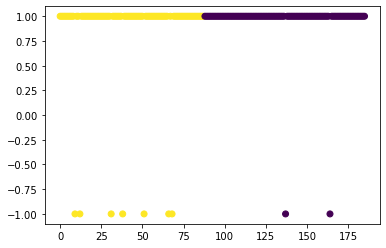

In [36]:
plt.scatter(x,res,c = y)

In [99]:
misc =[]
for i in range(len(y_pred)):
    if y_pred[i]==y_test[i]:
        print("true")
    else:
        misc.append(X_test[i])

true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true


In [100]:
len(misc)

9

In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, clf.predict(X_test))

array([[29,  2],
       [ 7, 18]], dtype=int64)

In [40]:
len(X_test[:,1])

56

(0.0, 0.01)

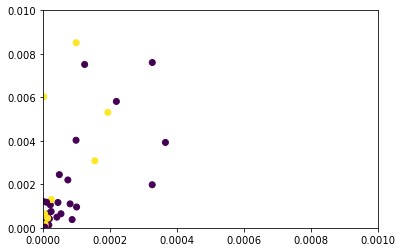

In [46]:
plt.scatter(X_test[:,0],X_test[:,1], c = y_pred)
plt.xlim([0,0.001])
plt.ylim([0,0.01])

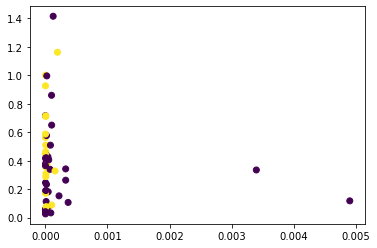

In [82]:
plt.scatter(X_test[:,0],X_test[:,181], c = y_pred)
#plt.xlim([0,0.001])
#plt.ylim([0,0.01])

NameError: name 'plot_decision_boundaries' is not defined

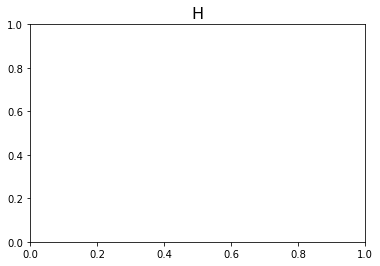

In [37]:
plt.figure()
plt.title("H",fontsize=16)
plot_decision_boundaries(X,y,Perceptron,tol=1e-3)
plt.show()

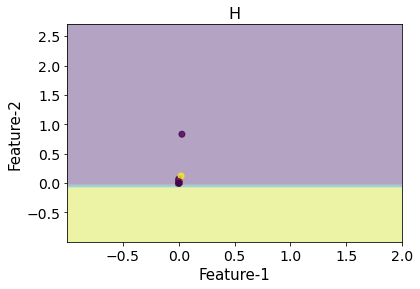

In [80]:
plt.figure()
plt.title("H",fontsize=16)
plot_decision_boundaries(X_train,y_train,Perceptron,tol=1e-3)
plt.show()

In [67]:
for i in range(len(X_test)):
    for j in range(len(X)):
        if (X_test[i]-X[j]==0):
            print(j)

ValueError: operands could not be broadcast together with shapes (100400,) (18000,) 